In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\remya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\remya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\traitlets\config\application.py", line 1075, in launch

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [79]:
image_dir=r"C:\Users\remya\OneDrive\Desktop\fire_and_smoke_original\fire_and_smoke"
no_fire_and_smoke_images=os.listdir(image_dir+ '/no_fire_and_smoke')
fire_and_smoke_high_intensity_images=os.listdir(image_dir+ '/High_intensity')
fire_and_smoke_low_intensity_images=os.listdir(image_dir+ '/Low_intensity')
print("--------------------------------------\n")

--------------------------------------



In [80]:
print('The length of NO Fire and Smoke images is',len(no_fire_and_smoke_images))
print('The length of Fire and Smoke High intensity images is',len(fire_and_smoke_high_intensity_images))
print('The length of Fire and Smoke Low intensity images is',len(fire_and_smoke_low_intensity_images))
print("--------------------------------------\n")


The length of NO Fire and Smoke images is 963
The length of Fire and Smoke High intensity images is 647
The length of Fire and Smoke Low intensity images is 328
--------------------------------------



In [81]:
dataset=[]
label=[]
img_siz=(128,128)

In [82]:
# Base directory containing all image categories
image_dir = r"C:\Users\remya\OneDrive\Desktop\fire_and_smoke_original\fire_and_smoke"

# Define categories and their corresponding labels
categories = {
    "no_fire_and_smoke": 0,
    "High_intensity": 2,
    "Low_intensity": 1
}

In [83]:
# Process each category
for category, class_label in categories.items():
    print(f"Processing category: {category}")
    
    # Get the path to the current category folder
    category_dir = os.path.join(image_dir, category)  # Combine base directory and category
    image_names = os.listdir(category_dir)  # Use category_dir, NOT categories
    

Processing category: no_fire_and_smoke
Processing category: High_intensity
Processing category: Low_intensity


In [85]:
for i, image_name in tqdm(enumerate(image_names), desc=f"Processing {category}"):
        # Ensure it's a valid image file (e.g., .jpg only in your original example)
        if not image_name.lower().endswith('jpg'):
            print(f"Skipping non-image file: {image_name}")
            continue
        
        # Construct the full path to the image
        image_path = os.path.join(category_dir, image_name)  # Use category_dir, not categories
        image = cv2.imread(image_path)
        
        # Check if the image is loaded correctly
        if image is None:
            print(f"Failed to read image: {image_path}")
            continue
        
        # Convert to RGB and resize
        image = Image.fromarray(image, 'RGB')
        image = image.resize(img_siz)
        
        # Append the processed image and its label to the dataset
        dataset.append(np.array(image))
        label.append(0)

Processing Low_intensity: 328it [00:02, 114.03it/s]


In [86]:
for i, image_name in tqdm(enumerate(fire_and_smoke_high_intensity_images), desc="Fire and Smoke High Intensity"):
    if image_name.split('.')[1].lower() == 'jpg':  # Ensure case-insensitive check for 'jpg'
        # Construct the full path for high intensity images
        image_path = os.path.join(image_dir, 'High_intensity', image_name)  # Use os.path.join for better path handling
        
        # Read the image using OpenCV
        image = cv2.imread(image_path)
        
        # Check if the image is loaded correctly
        if image is None:
            print(f"Failed to read image: {image_path}")
            continue
        
        # Convert image to RGB and resize
        image = Image.fromarray(image, 'RGB')
        image = image.resize(img_siz)
        
        # Append the image to the dataset with the label for high intensity (class label 2)
        dataset.append(np.array(image))
        label.append(2)  # Class label 2 for High Intensity images


Fire and Smoke High Intensity: 647it [00:07, 91.70it/s] 


In [87]:
for i, image_name in tqdm(enumerate(fire_and_smoke_low_intensity_images), desc="Fire and Smoke Low Intensity"):
    if image_name.split('.')[1].lower() == 'jpg':  # Ensure case-insensitive check for 'jpg'
        # Construct the full path for low intensity images
        image_path = os.path.join(image_dir, 'Low_intensity', image_name)  # Use os.path.join for better path handling
        
        # Read the image using OpenCV
        image = cv2.imread(image_path)
        
        # Check if the image is loaded correctly
        if image is None:
            print(f"Failed to read image: {image_path}")
            continue
        
        # Convert image to RGB and resize
        image = Image.fromarray(image, 'RGB')
        image = image.resize(img_siz)
        
        # Append the image to the dataset with the label for low intensity (class label 1)
        dataset.append(np.array(image))
        label.append(1)  # Class label 1 for Low Intensity images


Fire and Smoke Low Intensity: 328it [00:03, 101.66it/s]


In [88]:
# Convert dataset and label lists to numpy arrays
dataset = np.array(dataset, dtype="float32") / 255.0  # Normalize pixel values (optional)
label = np.array(label)

print("Dataset and labels have been successfully converted to numpy arrays!")


Dataset and labels have been successfully converted to numpy arrays!


In [89]:
print("--------------------------------------\n")
print('Dataset Length: ',len(dataset))
print('Label Length: ',len(label))
print("--------------------------------------\n")


--------------------------------------

Dataset Length:  1631
Label Length:  1631
--------------------------------------



In [90]:


print("--------------------------------------\n")
print("Train-Test Split")

# Splitting dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=42)

print("--------------------------------------\n")


--------------------------------------

Train-Test Split
--------------------------------------



In [91]:
print("--------------------------------------\n")
print("Normalaising the Dataset. \n")


--------------------------------------

Normalaising the Dataset. 



In [92]:
# Normalize the dataset using TensorFlow's normalize function
x_train = tf.keras.utils.normalize(x_train, axis=1)  # Normalize training images
x_test = tf.keras.utils.normalize(x_test, axis=1)    # Normalize test images

In [93]:
import tensorflow as tf

print("--------------------------------------\n")

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    # Change the number of neurons in the output layer to the number of classes (e.g., 3 classes)
    tf.keras.layers.Dense(3, activation='softmax')  # Use 'softmax' for multi-class classification
])

print("--------------------------------------\n")
model.summary()
print("--------------------------------------\n")


--------------------------------------



C:\Users\remya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--------------------------------------



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 127008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │    32,514,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,648,323 (124.54 MB)

 Trainable params: 32,648,323 (124.54 MB)

 Non-trainable params: 0 (0.00 B)

--------------------------------------



In [94]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)


In [95]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For integer encoded labels
              metrics=['accuracy'])


In [ ]:
print("--------------------------------------\n")
print("Training Started.\n")

# Train the model
class_weights = {0: 1.0, 1: 1.5, 2: 1.0}  # Adjust the weights for each class
history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.1, class_weight=class_weights)


print("Training Finished.\n")
print("--------------------------------------\n")


--------------------------------------

Training Started.

Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 622ms/step - accuracy: 0.7583 - loss: 0.5241 - val_accuracy: 0.7023 - val_loss: 0.4605
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 577ms/step - accuracy: 0.7412 - loss: 0.5208 - val_accuracy: 0.6412 - val_loss: 0.4604
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 571ms/step - accuracy: 0.7047 - loss: 0.5293 - val_accuracy: 0.7863 - val_loss: 0.4239
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 568ms/step - accuracy: 0.7894 - loss: 0.5171 - val_accuracy: 0.7252 - val_loss: 0.4580
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 572ms/step - accuracy: 0.7399 - loss: 0.5213 - val_accuracy: 0.7710 - val_loss: 0.4397
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 578ms/step - accuracy: 0.7772 - loss: 0.5110 - val_accuracy: 0.6336 - val_loss: 0.4674
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 574ms/step - accuracy: 0.6562 - loss: 0.5383 - val_accuracy: 0.7939 - val_loss: 0.4265
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 578m

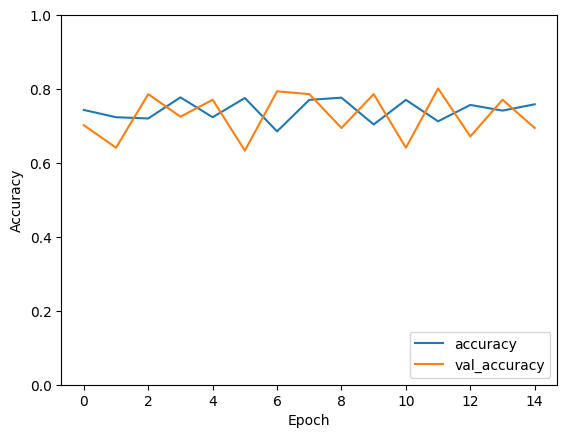

In [112]:
import matplotlib.pyplot as plt

# Plot and save accuracy
plt.plot(history.epoch, history.history['accuracy'], label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='val_accuracy')

# Label the axes
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Set the limits for the y-axis
plt.ylim([0, 1])

# Add a legend
plt.legend(loc='lower right')

# Save the plot as an image
plt.savefig(r"C:\Users\remya\OneDrive\Desktop\fire_and_smoke_original\result\fire_and_smoke_sample_accuracy_plot.png")

# Optionally, show the plot
plt.show()


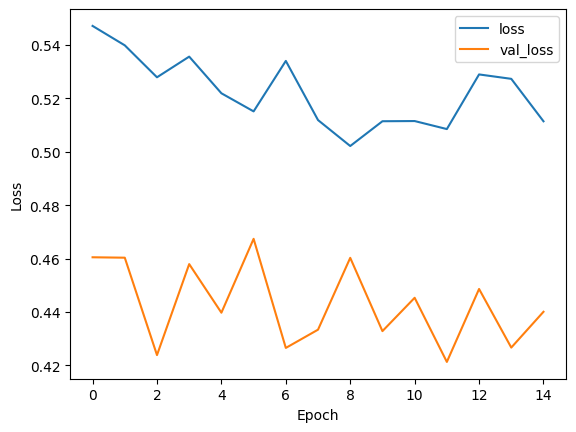

In [113]:
# Clear the previous plot
plt.clf()

# Plot and save loss
plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['val_loss'], label='val_loss')

# Label the axes
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Add a legend
plt.legend(loc='upper right')

# Save the plot as an image
plt.savefig(r"C:\Users\remya\OneDrive\Desktop\fire_and_smoke_original\result\fire_and_smoke_sample_loss_plot.png")

# Optionally, show the plot
plt.show()


In [114]:
print(f"y_test shape: {y_test.shape}")


y_test shape: (327,)


In [115]:
print("--------------------------------------\n")
print("Model Evaluation Phase.\n")

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {round(accuracy * 100, 2)}')
print("--------------------------------------\n")

# Predict the classes for the test set
y_pred = model.predict(x_test)

# Get the predicted class by selecting the class with the highest probability
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true class labels
y_true = y_test  # No need to use np.argmax if it's already integer-encoded
 

# Print the classification report
print('Classification Report\n', classification_report(y_true, y_pred_classes))
print("--------------------------------------\n")

--------------------------------------

Model Evaluation Phase.

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7515 - loss: 0.4468
Accuracy: 73.39
--------------------------------------

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.72      0.71      0.71       150
           1       0.27      0.28      0.27        58
           2       0.99      0.99      0.99       119

    accuracy                           0.73       327
   macro avg       0.66      0.66      0.66       327
weighted avg       0.74      0.73      0.74       327

--------------------------------------



In [116]:
model.save(r"C:\Users\remya\OneDrive\Desktop\fire_and_smoke_original\result\cnn_fire_and_smoke.keras")


print("--------------------------------------\n")
print("Model Prediction.\n")

--------------------------------------

Model Prediction.



In [ ]:
def make_prediction(img, model):
    # Preprocess the image
    img = Image.fromarray(img)
    img = img.resize((128, 128))  # Resize the image to the expected input size
    img = np.array(img)
    input_img = np.expand_dims(img, axis=0)

    # Normalize the image if required
    input_img = tf.keras.utils.normalize(input_img, axis=1)

    # Make prediction
    res = model.predict(input_img)

    # Print the output probabilities to see the model's decision
    print("Model output probabilities:", res)

    # Get the class with the highest probability
    predicted_class = np.argmax(res, axis=1)[0]
    prediction_prob = np.max(res, axis=1)[0]  # Get the highest probability

    # Print the predicted class label and probability
    if predicted_class == 0:
        print("Class 0: No Fire and Smoke")
    elif predicted_class == 1:
        print("Class 1: Low Intensity Fire and Smoke")
    elif predicted_class == 2:
        print("Class 2: High Intensity Fire and Smoke")
    else:
        print("Unknown class")

    return predicted_class, prediction_prob


In [ ]:
make_prediction(cv2.imread(r"C:\Users\remya\OneDrive\Desktop\fire_and_smoke_original\fire_and_smoke\High_intensity\19.jpg"),model)
print("--------------------------------------\n")
make_prediction(cv2.imread(r"C:\Users\remya\OneDrive\Desktop\fire_and_smoke_original\fire_and_smoke\Low_intensity\567.jpg"),model)
print("--------------------------------------\n")
make_prediction(cv2.imread(r"C:\Users\remya\OneDrive\Desktop\fire_and_smoke_original\fire_and_smoke\no_fire_and_smoke\25.jpg"),model)
print("--------------------------------------\n")

In [117]:
def make_prediction(img, model):
    # Preprocess the image
    img = Image.fromarray(img)
    img = img.resize((128, 128))  # Resize the image to the expected input size
    img = np.array(img)
    input_img = np.expand_dims(img, axis=0)

    # Normalize the image if required
    input_img = tf.keras.utils.normalize(input_img, axis=1)

    # Make prediction
    res = model.predict(input_img)

    # Print the output probabilities to see the model's decision
    print("Model output probabilities:", res)

    # Get the class with the highest probability
    predicted_class = np.argmax(res, axis=1)[0]

    # Print the predicted class label
    if predicted_class == 0:
        print("Class 0: No Fire and Smoke")
    elif predicted_class == 1:
        print("Class 1: Low Intensity Fire and Smoke")
    elif predicted_class == 2:
        print("Class 2: High Intensity Fire and Smoke")
    else:
        print("Unknown class")

    return predicted_class


In [120]:
make_prediction(cv2.imread(r"C:\Users\remya\OneDrive\Desktop\fire_and_smoke_original\fire_and_smoke\High_intensity\19.jpg"),model)
print("--------------------------------------\n")
make_prediction(cv2.imread(r"C:\Users\remya\OneDrive\Desktop\fire_and_smoke_original\fire_and_smoke\Low_intensity\567.jpg"),model)
print("--------------------------------------\n")
make_prediction(cv2.imread(r"C:\Users\remya\OneDrive\Desktop\fire_and_smoke_original\fire_and_smoke\no_fire_and_smoke\25.jpg"),model)
print("--------------------------------------\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Model output probabilities: [[1.962937e-06 4.203375e-06 9.999939e-01]]
Class 2: High Intensity Fire and Smoke
--------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Model output probabilities: [[4.8427805e-01 5.1540488e-01 3.1714328e-04]]
Class 1: Low Intensity Fire and Smoke
--------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Model output probabilities: [[0.45653188 0.44477674 0.09869136]]
Class 0: No Fire and Smoke
--------------------------------------

